# Case Study
## Table of Contents
<a href="#Importing-modules"<p style="text-decoration: none;"></span></span>Importing modules</a></div>

<a href="#Putting-it-all-together"</span>01. </span>Putting it all together</a></div>

<a href="#Exploratory-analysis"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;1a. </span>Exploratory analysis</a></div>

<a href="#Visualizing-your-data"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;1b. </span>Visualizing your data</a></div>

<a href="#Thinking-about-the-question-at-hand"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;1c. </span>Thinking about the question at hand</a></div>

<a href="#Assembling-your-data"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;1d. </span>Assembling your data</a></div>

<a href="#Initial-impressions-of-the-data"</span>02. </span>Initial impressions of the data</a></div>

<a href="#Reshaping-your-data"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;2a. </span>Reshaping your data</a></div>

<a href="#Checking-the-data-types"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;2b. </span>Checking the data types</a></div>

<a href="#Looking-at-country-spellings"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;2c. </span>Looking at country spellings</a></div>

<a href="#More-data-cleaning-and-processing"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;2d. </span>More data cleaning and processing</a></div>

<a href="#Wrapping-up"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;2e. </span>Wrapping up</a></div>

<a href="#Appendix:-Methods"<p style="text-decoration: none;"></span></span>Appendix: Methods</a></div>

## Import modules

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Putting it all together

## Exploratory analysis

Whenever you obtain a new dataset, your first task should always be to do some exploratory analysis to get a better understanding of the data and diagnose it for any potential issues.

The Gapminder data for the 19th century is here loaded as a DataFrame called g1800s. In the IPython Shell, use pandas methods such as .head(), .info(), and .describe(), and DataFrame attributes like .columns and .shape to explore it.

Use the information that you acquire from your exploratory analysis to choose the true statement from the options provided below.

In [19]:
# First import the dataset and begin to explore it
g1800s = pd.read_csv("g1800s.csv", index_col=0)
g1800s.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,27.29,27.28,27.27,27.26,27.25,27.24,27.23,27.22,27.21,27.20
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82


In [20]:
print('Shape: ',g1800s.shape)
print()
g1800s.info()
# There are 101 columns, one of which is object and the others of which are all float64 

Shape:  (260, 101)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Columns: 101 entries, Life expectancy to 1899
dtypes: float64(100), object(1)
memory usage: 207.2+ KB


In [21]:
g1800s.loc[:,['1800','1850','1899']].describe()

,1800,1850,1899
count,201.000000,201.000000,201.000000
mean,31.486020,31.635721,32.962985
std,3.763585,4.591803,6.325265
min,23.390000,14.000000,18.900000
25%,29.000000,29.170000,29.000000
50%,31.800000,31.800000,32.000000
75%,33.900000,34.050000,35.180000
max,42.850000,49.530000,51.620000


In [22]:
g1800s.columns

Index(['Life expectancy', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898',
       '1899'],
      dtype='object', length=101)

In [23]:
g1800s.shape

(260, 101)

In [24]:
# Sanity check - max and min of life expectancies
print(max(g1800s.select_dtypes(include=[np.number]).max()))
print(min(g1800s.select_dtypes(include=[np.number]).min()))

54.69
1.0


The max of 54.69 is plausible, but for a country to have a life expectancy of 1 is not. Will not deal with it here but would require inspection of the dataset - perhaps using a visual tool like excel. Then a decision on what to do with these strange values

## Visualizing your data

Since 1800, life expectancy around the globe has been steadily going up. You would expect the Gapminder data to confirm this.

The DataFrame g1800s has been pre-loaded. Your job in this exercise is to create a scatter plot with life expectancy in '1800' on the x-axis and life expectancy in '1899' on the y-axis.

Here, the goal is to visually check the data for insights as well as errors. When looking at the plot, pay attention to whether the scatter plot takes the form of a diagonal line, and which points fall below or above the diagonal line. This will inform how life expectancy in 1899 changed (or did not change) compared to 1800 for different countries. If points fall on a diagonal line, it means that life expectancy remained the same!

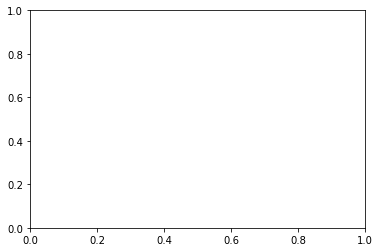

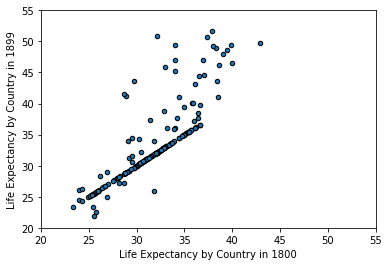

In [25]:
g1800s.plot(kind='scatter', x='1800', y='1899', edgecolor='k')

plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

plt.show()

There are a surprising number of countries that fall on the diagonal line - meaning their life expectancy did not change in 100 years! 
In fact, examining the DataFrame reveals that the life expectancy for 140 of the 260 countries did not change at all in the 19th century! This is possibly a result of not having access to the data for all the years back then. In this way, visualizing your data can help you uncover insights as well as diagnose it for errors

In [26]:
# Checking the mean life expectancy change
g1800s['le_change'] = g1800s['1899']-g1800s['1800']
print(np.mean(g1800s['le_change']))
del g1800s['le_change']

1.4769651741293535


## Thinking about the question at hand

Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.

Before continuing, however, it's important to make sure that the following assumptions about the data are true:

* 'Life expectancy' is the first column (index 0) of the DataFrame.
* The other columns contain either null or numeric values.
* The numeric values are all greater than or equal to 0.
* There is only one instance of each country.

You can write a function that you can apply over the entire DataFrame to verify some of these assumptions. Note that spending the time to write such a script will help you when working with other datasets as well.

In [27]:
def check_null_or_valid(row_data):
    """Function that takes a row of data, drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()  # The dataframe minus its na rows
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1

## Assembling your data
Here, three DataFrames have been pre-loaded: g1800s, g1900s, and g2000s. These contain the Gapminder life expectancy data for, respectively, the 19th century, the 20th century, and the 21st century.

Your task in this exercise is to concatenate them into a single DataFrame called gapminder. This is a row-wise concatenation, similar to how you concatenated the monthly Uber datasets in Chapter 3.

In [28]:
# Load the data
g1900s = pd.read_csv("g1900s.csv", index_col=0)
g2000s = pd.read_csv("g2000s.csv", index_col=0)

In [29]:
# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s,g1900s,g2000s])#,axis=1)

# Print the shape of gapminder
print(gapminder.shape)

# Print the head of gapminder
gapminder.head()

(780, 218)


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


## Reshaping your data

Now that you have all the data combined into a single DataFrame, the next step is to reshape it into a tidy data format.

Currently, the gapminder DataFrame has a separate column for each year. What you want instead is a single column that contains the year, and a single column that represents the average life expectancy for each year and country. By having year in its own column, you can use it as a predictor variable in a later analysis.

You can convert the DataFrame into the desired tidy format by _melting_ it.

In [30]:
# Melt gapminder: gapminder_melt
gapminder = pd.melt(frame=gapminder,id_vars=['Life expectancy'])

# Rename the columns
gapminder.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
print(gapminder.head())


                 country  year  life_expectancy
0               Abkhazia  1800              NaN
1            Afghanistan  1800            28.21
2  Akrotiri and Dhekelia  1800              NaN
3                Albania  1800            35.40
4                Algeria  1800            28.82


## Checking the data types

Now that your data is in the proper shape, you need to ensure that the columns are of the proper data type. That is, you need to ensure that country is of type object, year is of type int64, and life_expectancy is of type float64.

The tidy DataFrame has been pre-loaded as gapminder. Explore it in the IPython Shell using the .info() method. Notice that the column 'year' is of type object. This is incorrect, so you'll need to use the pd.to_numeric() function to convert it to a numeric data type.

In [31]:
# Convert the year column to numeric
gapminder.year = pd.to_numeric(gapminder.year)

# Test if country is of type object
assert gapminder.country.dtypes == np.object

# Test if year is of type int64
assert gapminder.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder.life_expectancy.dtypes == np.float64

### Looking at country spellings

Having tidied your DataFrame and checked the data types, your next task in the data cleaning process is to look at the 'country' column to see if there are any special or invalid characters you may need to deal with.

It is reasonable to assume that country names will contain:

* The set of lower and upper case letters.
* Whitespace between words.
* Periods for any abbreviations.

To confirm that this is the case, you can leverage the power of regular expressions again. For common operations like this, Python has a built-in string method - str.contains() - which takes a regular expression pattern, and applies it to the Series, returning True if there is a match, and False otherwise.

Since here you want to find the values that do not match, you have to invert the boolean, which can be done using ~. This Boolean series can then be used to get the Series of countries that have invalid names.

The approach to checking that country names are correct is to:
* Obtain a pd series which is the country names and remove any duplicates (of which there will be many - one for each year)
* Use regular expression to create a series of booleans checing if each country's name matches the valid pattern
* Invert this series of booleans so that the Trues are the invalid country names
* Filter our country series with this invalid country boolean list to obtain a list of the invalid countries

And, additionally to what was covered in the DataCamp course:
* Manually rename these and add as a list
* Replace the invalid names with the valid ones

In [32]:
# Create the series of countries: countries and drop dupes
countries = gapminder['country']
countries = countries.drop_duplicates()

pattern = '^[A-Za-z\.\s]*$'  # The pattern for countries is strings containing any number of letters, periods, and whitespace 

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)
mask

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
230     True
231     True
232     True
233     True
234     True
235     True
236     True
237     True
238     True
239     True
240     True
241     True
242     True
243     True
244     True
245     True
246     True
247     True
248     True
249     True
250     True
251    False
252    False
253    False
254     True
255     True
256     True
257     True
258    False
259     True
Name: country, Length: 260, dtype: bool

In [33]:
# Invert the mask: mask_inverse
mask_inverse = ~mask
mask_inverse

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
239    False
240    False
241    False
242    False
243    False
244    False
245    False
246    False
247    False
248    False
249    False
250    False
251     True
252     True
253     True
254    False
255    False
256    False
257    False
258     True
259    False
Name: country, Length: 260, dtype: bool

In [34]:
# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)

49           Congo, Dem. Rep.
50                Congo, Rep.
53              Cote d'Ivoire
73     Falkland Is (Malvinas)
93              Guinea-Bissau
98           Hong Kong, China
118     United Korea (former)
131              Macao, China
132            Macedonia, FYR
145     Micronesia, Fed. Sts.
161           Ngorno-Karabakh
187            St. Barthélemy
193    St.-Pierre-et-Miquelon
225               Timor-Leste
251     Virgin Islands (U.S.)
252      North Yemen (former)
253      South Yemen (former)
258                     Åland
Name: country, dtype: object


As you can see, not all these country names are actually invalid so maybe the assumptions need to be tweaked a little. However, there certainly are a few cases worth further investigation, such as St. Barth?lemy. Whenever you are dealing with columns of raw data consisting of strings, it is important to check them for consistency like this.

In [35]:
invalid = list(invalid_countries)
valid = ['Congo DRC', 'Congo Rep.', 'Cote dIvoire', 'Falkland Islands', 'Guinea Bissau', 'Hong Kong',
 'United Korea', 'Macao', 'Macedonia', 'Micronesia', 'Ngorn Karabakh', 'St. Barthelemy',
 'St. Pierre et Miquelon', 'Timor Leste', 'Virgin Islands', 'North Yemen', 'South Yemen', 'Aland Islands']

In [36]:
# Now use this list to convert the bad named countries to good ones in a list

valid_countries = []
for country in list(gapminder.country):
    if country in invalid:
        new = valid[invalid.index(country)]
        valid_countries.append(new)
    else:
        valid_countries.append(country)
valid_countries

['Abkhazia',
 'Afghanistan',
 'Akrotiri and Dhekelia',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Christmas Island',
 'Cocos Island',
 'Colombia',
 'Comoros',
 'Congo DRC',
 'Congo Rep.',
 'Cook Is',
 'Costa Rica',
 'Cote dIvoire',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Czechoslovakia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Germany',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea

In [37]:
# Now change the dataframe's "country" column
gapminder['country'] = valid_countries

## More data cleaning and processing
It's now time to deal with the missing data. There are several strategies for this: You can drop them, fill them in using the mean of the column or row that the missing value is in (also known as [imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)), or, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column. See [pandas Foundations](https://www.datacamp.com/courses/pandas-foundations) for more on forward fill and backward fill.

In general, it is not the best idea to drop missing values, because in doing so you may end up throwing away useful information. In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. You could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy you go with, it is important to carefully consider all options and understand how they will affect your data.

In this exercise, you'll practice dropping missing values. Your job is to drop all the rows that have NaN in the life_expectancy column. Before doing so, it would be valuable to use assert statements to confirm that year and country do not have any missing values.

Begin by printing the shape of gapminder in the IPython Shell prior to dropping the missing values. Complete the exercise to find out what its shape will be after dropping the missing values!

In [47]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder.year).all()

# Drop the missing values
gapminder = gapminder.dropna(axis=0,how='any')

# Print the shape of gapminder
print(gapminder.shape)

(43857, 3)


## Wrapping up

Now that you have a clean and tidy dataset, you can do a bit of visualization and aggregation. In this exercise, you'll begin by creating a histogram of the life_expectancy column. You should not get any values under 0 and you should see something reasonable on the higher end of the life_expectancy age range.

Your next task is to investigate how average life expectancy changed over the years. To do this, you need to subset the data by each year, get the life_expectancy column from each subset, and take an average of the values. You can achieve this using the .groupby() method. This .groupby() method is covered in greater depth in [Manipulating DataFrames with pandas](https://www.datacamp.com/courses/manipulating-dataframes-with-pandas).

Finally, you can save your tidy and summarized DataFrame to a file using the .to_csv() method.

* [.groupby()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

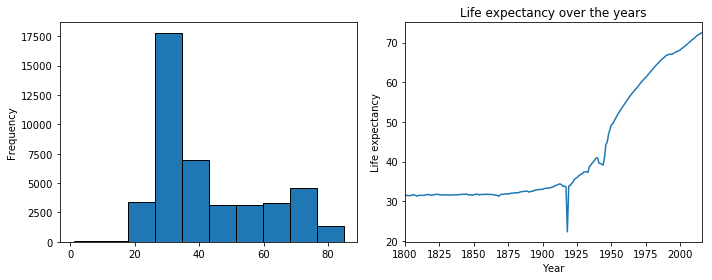

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64

year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


In [66]:
# Create a figure for the plots to control their size
fig = plt.figure(figsize=(10,4))

# Add first subplot
plt.subplot(1, 2, 1) 

# Create a histogram of life_expectancy
gapminder.life_expectancy.plot(kind='hist', edgecolor='k')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

# Add second subplot
plt.subplot(1, 2, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Print the head of gapminder_agg
print(gapminder_agg.head())
print()
# Print the tail of gapminder_agg
print(gapminder_agg.tail())

Amazing work! You've stepped through each stage of the data cleaning process and your data is now ready for serious analysis! Looking at the line plot, it seems like life expectancy has, as expected, increased over the years. There is a surprising dip around 1920 that may be worth further investigation!

## Comparing life expectancy in the different centuries
In addition to the DataCamp material, this section visualises the difference between the life expectancies in the different centuries by showing frequency histograms

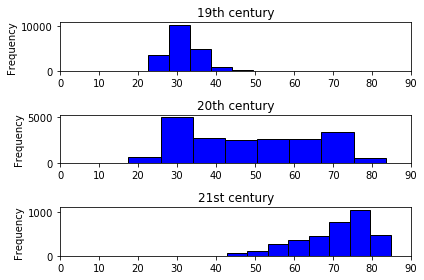

In [68]:
# Define the data subsets
gap18 = gapminder[gapminder['year'] < 1900]
gap19 = gapminder[(gapminder['year'] > 1899) & (gapminder['year'] < 2000)]
gap20 = gapminder[gapminder['year'] > 1999]

# Plot 1: 19th century
plt.subplot(3, 1, 1)  
gap18.life_expectancy.plot(kind='hist', color='b', edgecolor='k')
plt.xlim(left=0, right=90)
plt.title('19th century')

# Plot 2: 20th century
plt.subplot(3, 1, 2)  
gap19.life_expectancy.plot(kind='hist', color='b', edgecolor='k')
plt.xlim(left=0, right=90)
plt.title('20th century')

# Plot 3: 21st century
plt.subplot(3, 1, 3)  
gap20.life_expectancy.plot(kind='hist', color='b', edgecolor='k')
plt.xlim(left=0, right=90)
plt.title('21st century')

plt.tight_layout()  
plt.show()

## Saving the data as csvs

In [69]:
# Save both DataFrames to csv files
gapminder.to_csv('gapminder.csv')
gapminder_agg.to_csv('gapminder_agg.csv')

## Appendix: Methods

* [.groupby()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)